Qfit Qfiterr
[4.77456182e-10]
[2.45463496e-12]


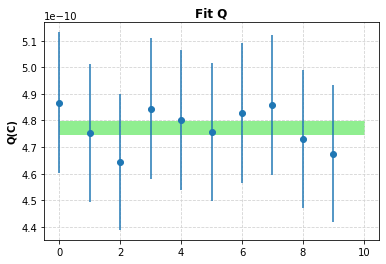

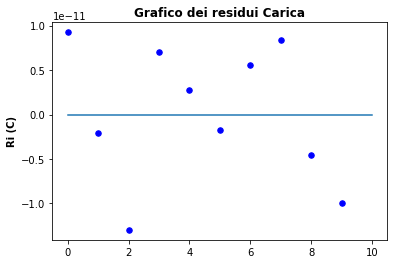

sigma_post_fit
7.730816012616133e-12
Qerr
[2.64742343e-11 2.60412658e-11 2.56288543e-11 2.63881973e-11
 2.62272150e-11 2.60550073e-11 2.63312900e-11 2.64388379e-11
 2.59462010e-11 2.57447330e-11]


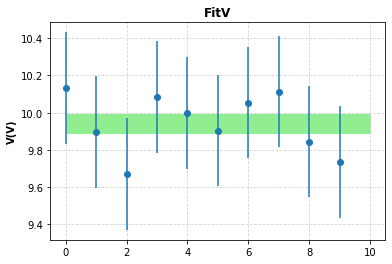

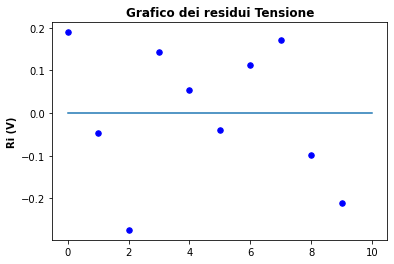

sigma_post_fit
0.16090545190966538
Verr
[0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3]


In [4]:
#sfera attaccata al generatore, si carica la bacchetta sulla sfera, si scarica sull'ice pail e si misura V
#sempre con una sola bacchettata per verificare se la carica trasferita è costante

import numpy as np
import matplotlib.pyplot as plt


D2 = 0.15
D1 = 0.1
D2err = 0.01
D1err = 0.0001
L = 0.15
Lerr = 0.0001
eps = 8.859E-12

Cg = 2*np.pi*eps*L/np.log(D2/D1)
epsL = Lerr/L
errlnD2 = D2err/D2
epslnD2 = errlnD2/np.abs(np.log(D2))
errlnD1 = D1err/D1
epslnD1 = errlnD1/np.abs(np.log(D1))
Cgerr = Cg*(epsL+epslnD1+epslnD2)

Ve = np.ones(10)*10
Ve_err = np.ones(len(Ve))*0.3
Ve = Ve-np.random.normal(0, Ve_err, len(Ve))
#Ve = np.array([])
#Ve_err = np.array([])

Ce = 2.74424417e-11
Ce_err = 2.06085147e-12

Q = (Cg+Ce)*Ve
Qerr = Q*((((Cgerr)**2+Ce_err**2)**(1/2)/(Cg+Ce))**2+(Ve_err/Ve)**2)**(1/2)

fit,cov = np.polyfit(np.arange(0,len(Q),1),Q, 0,w = 1/Qerr,cov="True")
Qfit = fit
Qfiterr = np.sqrt(np.diag(cov))

print("Qfit Qfiterr")
print(Qfit)
print(Qfiterr)

fig = plt.figure()
ax = fig.gca()
plt.title("Fit Q",fontweight="bold")
plt.ylabel("Q(C)",fontweight="bold")

plt.grid(color='lightgray',linestyle="--",zorder=0)
plt.errorbar(np.arange(0,len(Q),1), Q, yerr=Qerr, fmt='o')

y_erroreMin = Qfit-Qfiterr

y_erroreMax = Qfit+Qfiterr

plt.fill_between(np.linspace(0,len(Q),100),y_erroreMin,y_erroreMax, color="lightgreen",zorder=1)
plt.show()



Ri = Q-Qfit

fig = plt.figure()
ax = fig.gca()
plt.title("Grafico dei residui Carica",fontweight="bold")
plt.ylabel("Ri (C)",fontweight="bold")
plt.plot(np.linspace(0,10,1000),np.zeros(1000))
plt.scatter(np.arange(0,len(Q),1),Ri, s=30, color='blue',zorder=3)

plt.show()


sigma_post_fit = (np.sum((Ri)**2)/(len(Q)-1))**(1/2)
print("sigma_post_fit")
print(sigma_post_fit)

print("Qerr")
print(Qerr)

#V
fit,cov = np.polyfit(np.arange(0,len(Q),1),Ve, 0,w = 1/Ve_err,cov="True")
Vfit = fit
Vfiterr = np.sqrt(np.diag(cov))


fig = plt.figure()
ax = fig.gca()
plt.title("FitV",fontweight="bold")
plt.ylabel("V(V)",fontweight="bold")

plt.grid(color='lightgray',linestyle="--",zorder=0)
plt.errorbar(np.arange(0,len(Q),1), Ve, yerr=Ve_err, fmt='o')

y_erroreMin = Vfit-Vfiterr

y_erroreMax = Vfit+Vfiterr

plt.fill_between(np.linspace(0,len(Q),100),y_erroreMin,y_erroreMax, color="lightgreen",zorder=1)
plt.show()



Ri = Ve-Vfit

fig = plt.figure()
ax = fig.gca()
plt.title("Grafico dei residui Tensione",fontweight="bold")
plt.ylabel("Ri (V)",fontweight="bold")
plt.plot(np.linspace(0,10,1000),np.zeros(1000))
plt.scatter(np.arange(0,len(Q),1),Ri, s=30, color='blue',zorder=3)

plt.show()


sigma_post_fit = (np.sum((Ri)**2)/(len(Q)-1))**(1/2)
print("sigma_post_fit")
print(sigma_post_fit)

print("Verr")
print(Ve_err)